In [2]:
import config as cfg
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
merged = gpd.read_file(cfg.INCOME_DATA / 'geometries_and_income.geojson') 
distritos = pd.read_csv(cfg.ZONIFICACION_DATA / 'distritos/PROCESSED_nombres_distritos.csv')
all_viajes = pd.read_csv(cfg.VIAJES_DATA / 'viajes_week_0322.csv',thousands='.',decimal=',')
filtered_viajes = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]
population = pd.read_csv('raw/poblacion_distritos_enero_21.csv', sep=';') # SOURCE: https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/?vgnextfmt=default&vgnextchannel=8156e39873674210VgnVCM1000000b205a0aRCRD

In [26]:
all_viajes.viajes.sum()

np.float64(249991951.61424202)

In [25]:
filtered_viajes.viajes.sum()

np.float64(88878358.8846572)

In [27]:
filtered_viajes.viajes.describe()

count    4.839108e+06
mean     1.836668e+01
std      3.860299e+01
min      1.000000e+00
25%      4.170000e+00
50%      8.507000e+00
75%      1.744000e+01
max      1.115186e+03
Name: viajes, dtype: float64

In [28]:
filtered_viajes.viajes_km.describe()

count    4.839108e+06
mean     5.632886e+01
std      7.383531e+01
min      1.000000e+00
25%      1.636300e+01
50%      3.354400e+01
75%      6.699400e+01
max      1.907600e+03
Name: viajes_km, dtype: float64

In [32]:
all_viajes

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,hombre,29.337,30.222
1,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,mujer,34.143,27.522
2,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,hombre,92.799,63.331
3,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,mujer,65.475,44.556
4,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,45-65,hombre,44.319,31.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900950,20220331,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,0-25,hombre,6.787,19.129
19900951,20220331,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,25-45,mujer,3.400,9.053
19900952,20220331,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,65-100,hombre,2.005,4.716
19900953,20220331,23,2807921,2807921,2-10,trabajo_estudio,no_frecuente,no,no,28,10-15,0-25,hombre,9.134,33.998


## Median Income Distribution

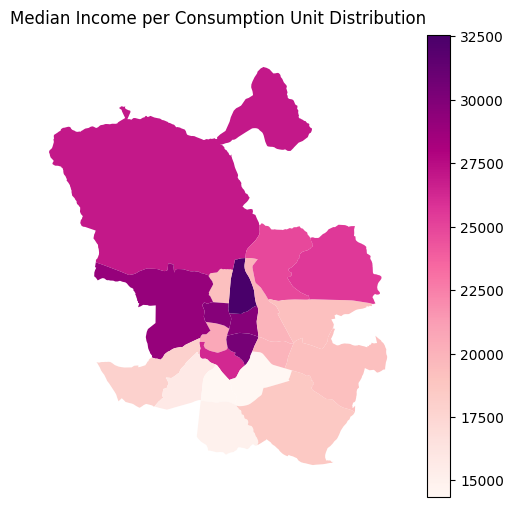

In [3]:
fig, ax = plt.subplots(1, figsize=(6, 6))
merged.plot(
        column='Median income per consumption unit',  # Column containing the LISA values
        cmap='RdPu',        # Use the RdPu colormap
        legend=True,            # Show legend
        ax=ax                   # Axis to plot on
    )
    
    # Set the title with global statistics
ax.set_title('Median Income per Consumption Unit Distribution'
    )

    # Remove axis labels
ax.set_axis_off()

## The City of Madrid

In [4]:
gdf_with_names = merged.merge(distritos[['ID', 'name_2']], on='ID')
gdf_with_names = gdf_with_names[['ID', 'geometry', 'name_2']]
gdf_with_names['ID'] = gdf_with_names['ID'].astype(str).str[-2:]
gdf_with_names = gdf_with_names.to_crs(epsg=3857)

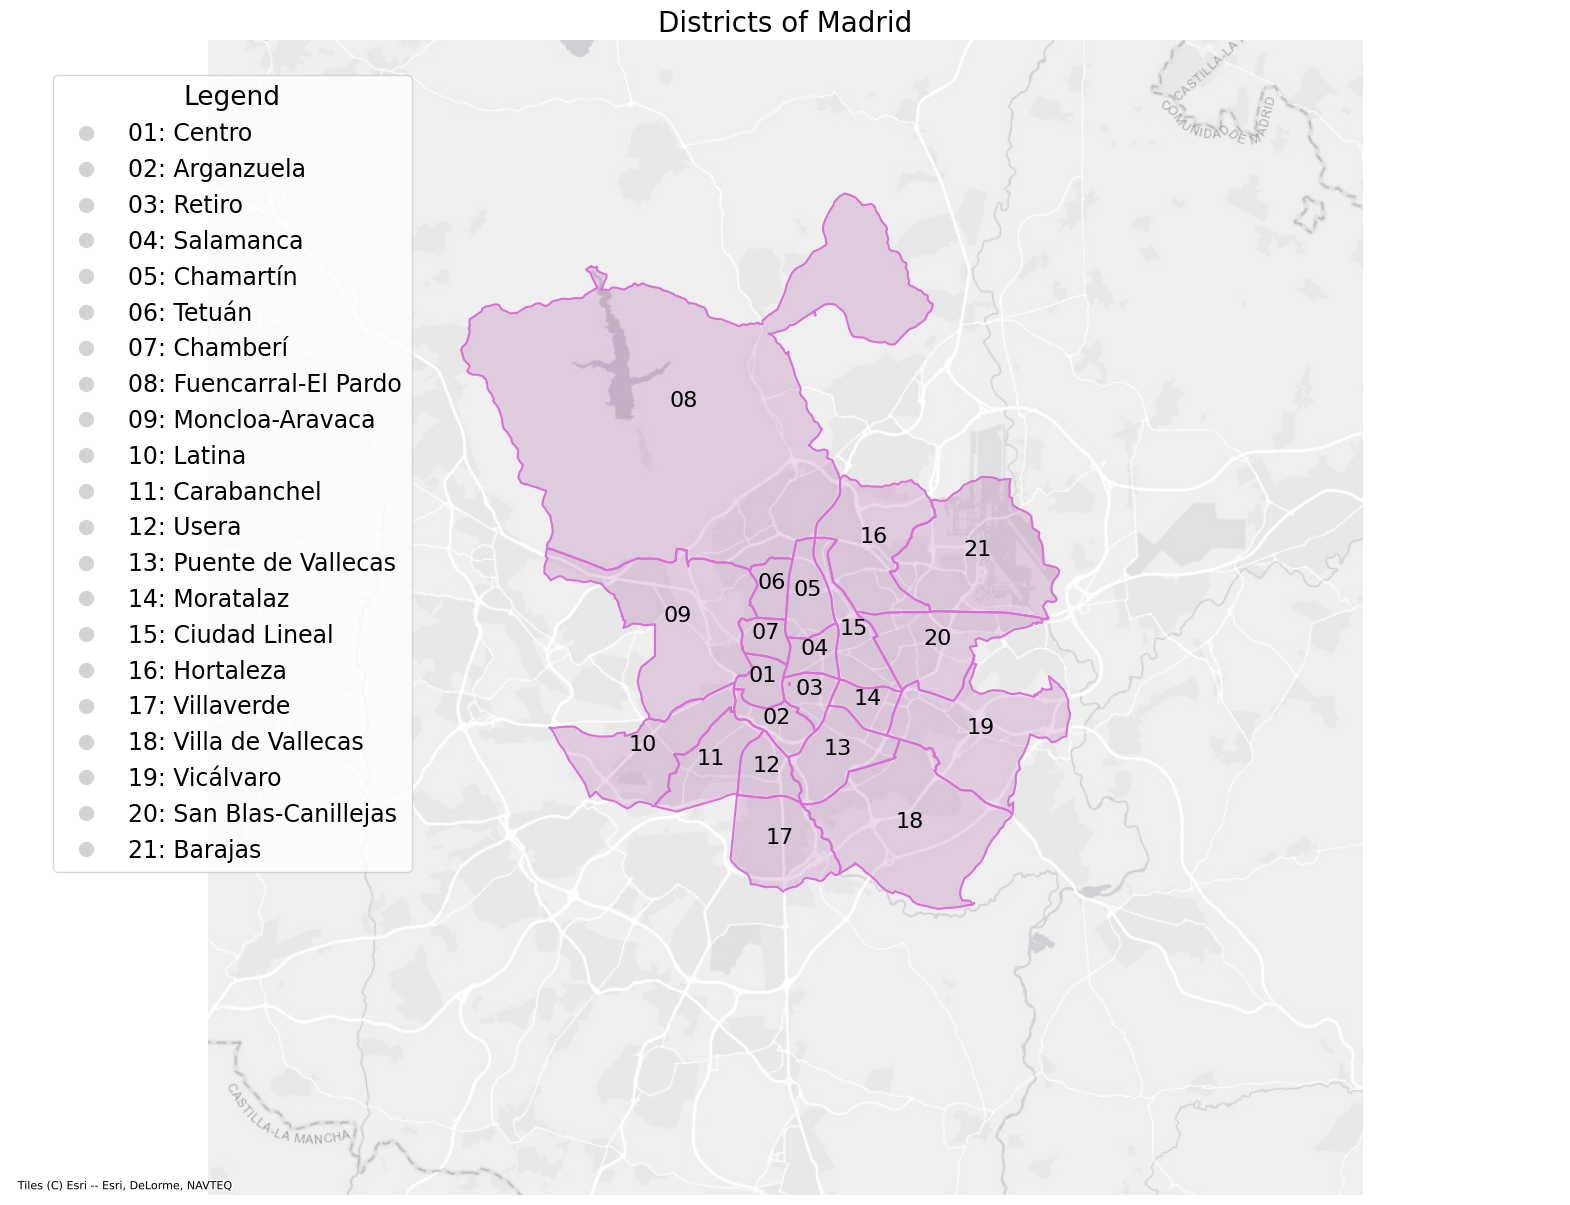

In [44]:
ax = gdf_with_names.plot(figsize=(20,15), color="purple", alpha=0.15)
gdf_with_names.boundary.plot(color="#DA70D6", ax=ax)

ctx.add_basemap(ax,
               crs=gdf_with_names.crs.to_string(),
               source=ctx.providers.Esri.WorldGrayCanvas
              )

bounds = gdf_with_names.total_bounds
ax.set_xlim(bounds[0], bounds[2])  # Set x-axis (longitude)
ax.set_ylim(bounds[1], bounds[3])  # Set y-axis (latitude)

texts = []

# Add district names as annotations
for x, y, label in zip(gdf_with_names.geometry.centroid.x, 
                       gdf_with_names.geometry.centroid.y, 
                       gdf_with_names['ID']):
    texts.append(ax.text(x, y, label, fontsize=16, ha='center', color='black'))  # Change color of text to red

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label=f"{num}: {name}",
                          markerfacecolor='lightgray', markersize=12)
                   for num, name in zip(gdf_with_names['ID'], gdf_with_names['name_2'])]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98),  # Adjust position inside plot
          title='Legend', fontsize=17, title_fontsize=19, frameon=True)  # Larger font sizes and frame

# Remove axes
ax.set_axis_off()
ax.set_title('Districts of Madrid', fontsize=20)
plt.axis('equal')

if cfg.SAVE_FIGURES:
    plt.savefig(cfg.FIGURES_PATH / 'districts_of_madrid.png', dpi=300, bbox_inches='tight')

## Distritos and Population

In [5]:
population = population.drop(columns=['Total.1'])
population.columns = ['ID', 'Population']
distritos['ID'] = distritos['ID'].astype(str)
population['ID'] = population['ID'].astype(str)

In [6]:
distritos_and_pop = pd.merge(distritos, population, left_index=True, right_index=True)
distritos_and_pop = distritos_and_pop.drop(columns=['ID_y'])
distritos_and_pop = distritos_and_pop.rename(columns={'ID_x': 'ID'})

In [8]:
distritos_and_pop

,ID,name,name_2,Population
0,2807901,Madrid distrito 01,Centro,142.099
1,2807902,Madrid distrito 02,Arganzuela,154.809
2,2807903,Madrid distrito 03,Retiro,119.006
3,2807904,Madrid distrito 04,Salamanca,146.698
4,2807905,Madrid distrito 05,Chamartín,146.230
5,2807906,Madrid distrito 06,Tetuán,160.390
6,2807907,Madrid distrito 07,Chamberí,139.167
7,2807908,Madrid distrito 08,Fuencarral-El Pardo,248.384
8,2807909,Madrid distrito 09,Moncloa-Aravaca,121.339
9,2807910,Madrid distrito 10,Latina,241.013


In [9]:
if cfg.SAVE_DATASETS:
    distritos_and_pop.to_csv(cfg.DATASETS_PATH / 'districts_and_population.csv', index=False)

## Gini Index

In [4]:
distritos_and_pop = pd.read_csv(cfg.DATASETS_PATH / 'districts_and_population.csv')
merged['ID'] = merged['ID'].astype(str)
distritos_and_pop['ID'] = distritos_and_pop['ID'].astype(str)
gini_and_districts = pd.merge(merged[['ID', 'Gini Index']], distritos_and_pop[['ID', 'name_2']], on='ID')

# Select the 'name_2' and 'Gini Index' columns
gini_and_districts = gini_and_districts[['name_2', 'Gini Index']]

gini_and_districts = gini_and_districts.rename(columns={'name_2': 'District'})

In [12]:
if cfg.SAVE_DATASETS:
    gini_and_districts.to_csv(cfg.DATASETS_PATH / 'districts_and_gini.csv', index=False)

In [13]:
gini_and_districts

,District,Gini Index
0,Centro,39.8
1,Arganzuela,31.0
2,Retiro,33.1
3,Salamanca,40.2
4,Chamartín,40.2
5,Tetuán,37.6
6,Chamberí,37.9
7,Fuencarral-El Pardo,34.4
8,Moncloa-Aravaca,40.2
9,Latina,31.8


## Global Moran's I

In [8]:
df = pd.read_csv('/Users/caro/Desktop/thesis_project/segregation_indices/outputs/global_morans_i_df.csv')

variables = df['Variable']  # The income variables
morans_I = df['Global Morans I']  # The Global Moran's I values
p_values = df['P-value']  # The p-values

In [9]:
df

,Variable,Global Morans I,P-value,Z-Score
0,Average income per consumption unit,0.417,0.001,3.814
1,Median income per consumption unit,0.315,0.006,2.755
2,Average gross income per household,0.370,0.001,3.441
3,Average gross income per person,0.453,0.003,3.956
4,Average net income per household,0.358,0.004,3.299
5,Average net income per person,0.459,0.001,4.018


In [41]:
sns.set(font_scale=1.7) # TODO: Check this!

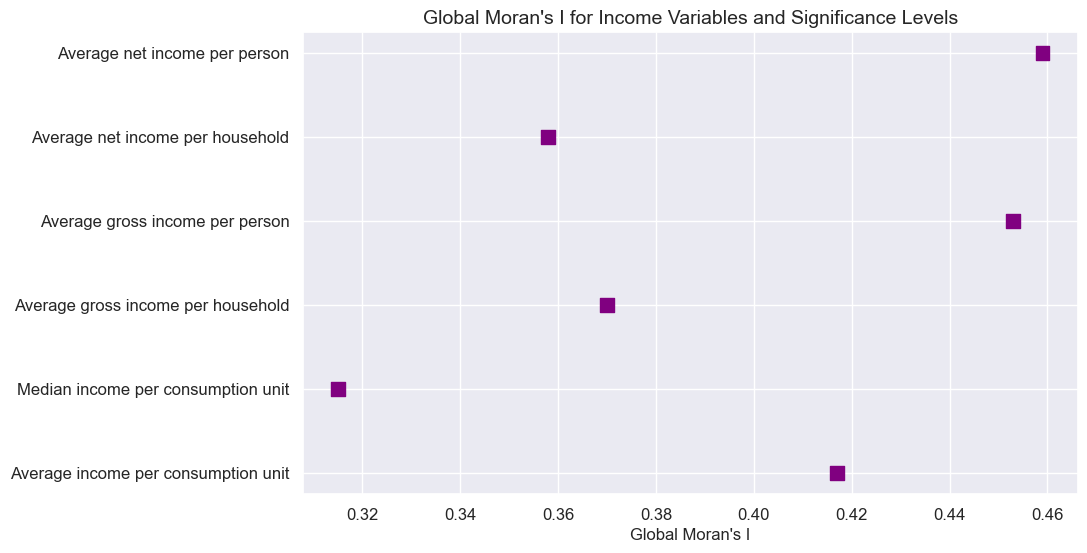

In [51]:
colors = ['purple' if p < 0.05 else 'black' for p in p_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(morans_I, variables, color=colors, s=100,  marker='s')  # s sets the size of the dots

# Set labels and title
plt.xlabel('Global Moran\'s I', fontsize=12)
plt.title('Global Moran\'s I for Income Variables and Significance Levels', fontsize=14)
plt.xticks(fontsize=12)

# Customizing the y-axis labels (income variables)
plt.yticks(range(len(variables)), variables, fontsize=12)

if cfg.SAVE_FIGURES:
    plt.savefig(cfg.FIGURES_PATH / 'global_morans_significance.png', dpi=300, bbox_inches='tight')

## Income data

In [13]:
merged = gpd.read_file(cfg.INCOME_DATA / 'geometries_and_income.geojson') 

In [14]:
merged['Average income per consumption unit'].describe()

count       21.000000
mean     27070.333333
std       8453.982921
min      16116.000000
25%      20469.000000
50%      24874.000000
75%      32322.000000
max      43930.000000
Name: Average income per consumption unit, dtype: float64

In [16]:
income_stats = merged.describe()
income_stats_big = income_stats.drop(columns=['ID', 'Gini Index'])
income_stats_small = income_stats[['Gini Index']]
income_stats_big = income_stats_big.round(3)
income_stats_small = income_stats_small.round(3)

if cfg.SAVE_DATASETS:
    income_stats_big.to_csv(cfg.DATASETS_PATH / 'income_stats.csv', index=True)
    income_stats_small.to_csv(cfg.DATASETS_PATH / 'gini_stats.csv', index=True)

In [17]:
income_stats_big

,Average income per consumption unit,Median income per consumption unit,Average gross income per household,Average gross income per person,Average net income per household,Average net income per person
count,21.000,21.000,21.000,21.000,21.000,21.000
mean,27070.333,22350.000,57604.857,23275.381,44733.381,18045.048
std,8453.983,5829.666,18974.136,8209.685,12225.614,5363.163
min,16116.000,14350.000,33395.000,12678.000,28681.000,10797.000
25%,20469.000,18550.000,42779.000,16498.000,35278.000,13719.000
50%,24874.000,19950.000,50487.000,21495.000,39991.000,17026.000
75%,32322.000,26950.000,72362.000,27311.000,55125.000,20671.000
max,43930.000,32550.000,97093.000,39346.000,69670.000,28233.000


In [18]:
income_stats_big = income_stats_big.drop(index='count')
income_stats_big = income_stats_big.reset_index().rename(columns={'index': 'Statistic'})

income_stats_small = income_stats_small.drop(index='count')
income_stats_small = income_stats_small.reset_index().rename(columns={'index': 'Statistic'})

In [19]:
income_stats_big

,Statistic,Average income per consumption unit,Median income per consumption unit,Average gross income per household,Average gross income per person,Average net income per household,Average net income per person
0,mean,27070.333,22350.000,57604.857,23275.381,44733.381,18045.048
1,std,8453.983,5829.666,18974.136,8209.685,12225.614,5363.163
2,min,16116.000,14350.000,33395.000,12678.000,28681.000,10797.000
3,25%,20469.000,18550.000,42779.000,16498.000,35278.000,13719.000
4,50%,24874.000,19950.000,50487.000,21495.000,39991.000,17026.000
5,75%,32322.000,26950.000,72362.000,27311.000,55125.000,20671.000
6,max,43930.000,32550.000,97093.000,39346.000,69670.000,28233.000


In [20]:
income_stats_big = income_stats_big.melt(id_vars='Statistic', var_name='Income Category', value_name='Value')

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_89602/3797099939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Category', y='Value', data=income_stats_big, palette='Set3')


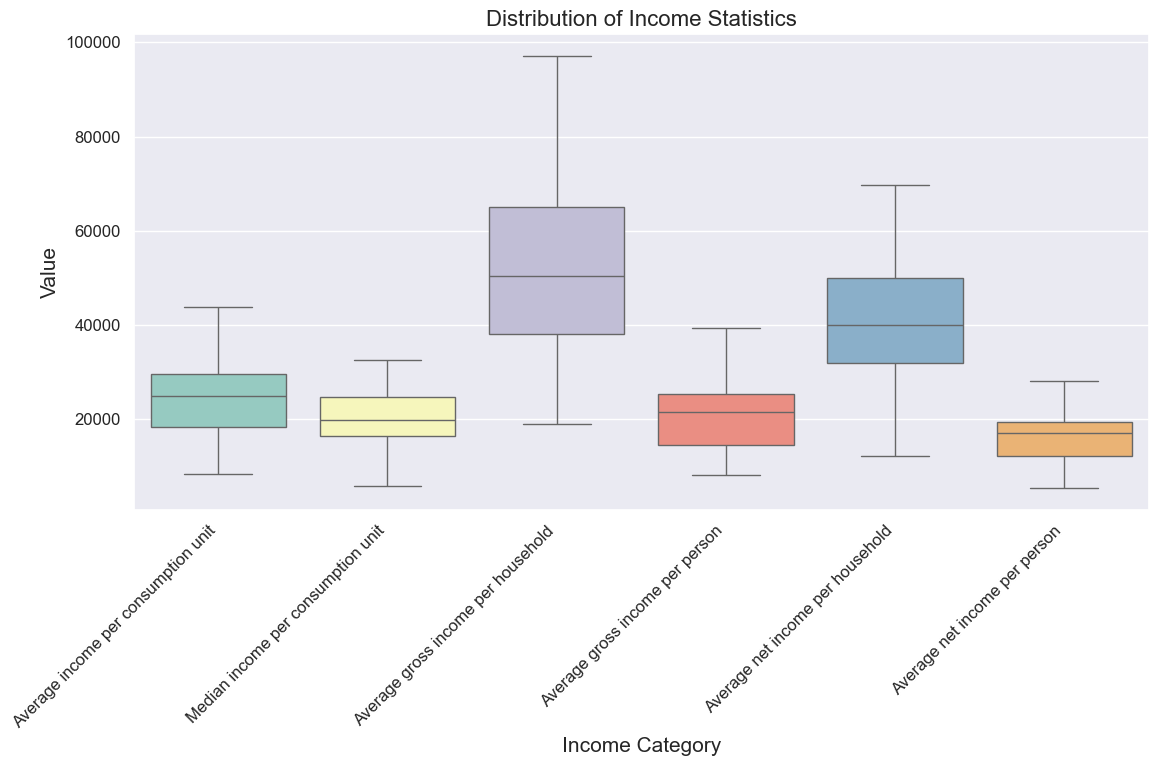

In [36]:
# Plotting the violin plot
plt.figure(figsize=(12, 8))

sns.boxplot(x='Income Category', y='Value', data=income_stats_big, palette='Set3')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)  # Increase the font size of y-tick labels
plt.title('Distribution of Income Statistics', fontsize=16)  # Increase the font size of the title
plt.xlabel('Income Category', fontsize=15)  # Increase font size for x-axis label
plt.ylabel('Value', fontsize=15)  # Increase font size for y-axis label
plt.tight_layout()

if cfg.SAVE_FIGURES:
    plt.savefig(cfg.FIGURES_PATH / 'income_statistics_boxplot.png', dpi=300, bbox_inches='tight')

## Trips and Normalized Trips

In [5]:
all_viajes.shape

(5202336, 15)

In [6]:
filtered_viajes.shape

(1260778, 15)

In [18]:
normalized_trip_counts = pd.read_csv('/Users/caro/Desktop/thesis_project/trip_analysis/outputs/081224_FINAL_normalized_trip_count.csv')

In [19]:
normalized_trip_counts

,origen,destino,trip_count,origin,destination,normalized_trip_count
0,2807901,2807901,313587212,Centro,Centro,0.410038
1,2807901,2807902,67813563,Centro,Arganzuela,0.088671
2,2807901,2807903,30102878,Centro,Retiro,0.039362
3,2807901,2807904,37364188,Centro,Salamanca,0.048856
4,2807901,2807905,21694487,Centro,Chamartín,0.028367
...,...,...,...,...,...,...
436,2807921,2807917,1015320,Barajas,Villaverde,0.003184
437,2807921,2807918,1803896,Barajas,Villa de Vallecas,0.005657
438,2807921,2807919,1980570,Barajas,Vicálvaro,0.006211
439,2807921,2807920,43890497,Barajas,San Blas-Canillejas,0.137648


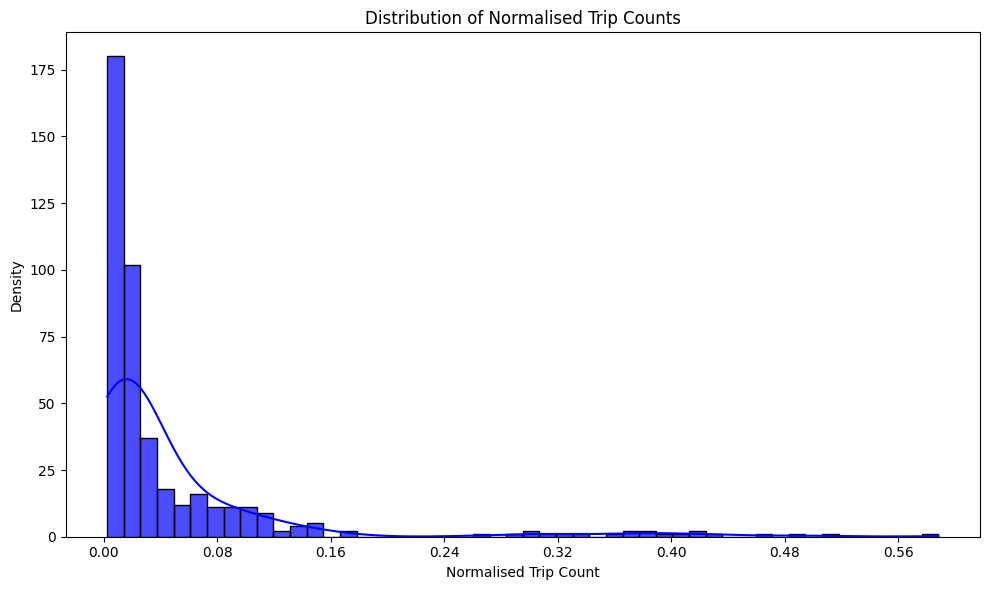

In [20]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
sns.histplot(normalized_trip_counts['normalized_trip_count'], bins=50, kde=True, color='blue', alpha=0.7)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))

formatter = mticker.ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)

plt.title('Distribution of Normalised Trip Counts')
plt.xlabel('Normalised Trip Count')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig(cfg.FIGURES_PATH / 'normalized_trip_count_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

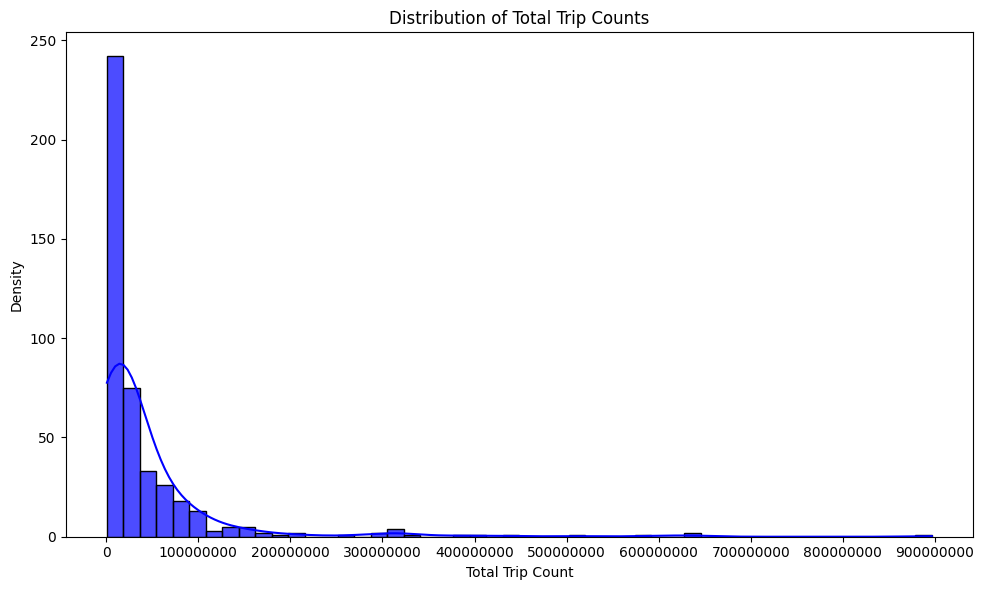

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(normalized_trip_counts['trip_count'], bins=50, kde=True, color='blue', alpha=0.7)

ax = plt.gca()  # Get the current axis

# Set axis formatter to remove scientific notation
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# Set a reasonable number of x-axis bins
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))

plt.title('Distribution of Total Trip Counts')
plt.xlabel('Total Trip Count')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig(cfg.FIGURES_PATH / 'unnormalized_trip_count_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Extra Descriptives

In [15]:
normalized_trip_counts.describe()

,origen,destino,trip_count,normalized_trip_count
count,4.410000e+02,4.410000e+02,4.410000e+02,441.000000
mean,2.807911e+06,2.807911e+06,2.015382e+05,0.047619
std,6.062178e+00,6.062178e+00,4.009792e+05,0.083778
min,2.807901e+06,2.807901e+06,3.378858e+03,0.002217
25%,2.807906e+06,2.807906e+06,3.162205e+04,0.008597
50%,2.807911e+06,2.807911e+06,7.210508e+04,0.018056
75%,2.807916e+06,2.807916e+06,1.977529e+05,0.043290
max,2.807921e+06,2.807921e+06,3.964093e+06,0.575694


In [22]:
filtered_viajes

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,hombre,29.337,30.222
1,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,mujer,34.143,27.522
2,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,hombre,92.799,63.331
3,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,mujer,65.475,44.556
4,20220301,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,45-65,hombre,44.319,31.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900884,20220331,23,2807921,2807921,2-10,casa,no_frecuente,no,no,28,>15,25-45,mujer,3.400,7.835
19900885,20220331,23,2807921,2807921,2-10,casa,no_frecuente,no,no,28,>15,45-65,hombre,2.005,9.351
19900886,20220331,23,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,25-45,hombre,4.940,12.918
19900887,20220331,23,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,45-65,hombre,4.010,9.502


In [23]:
filtered_viajes.groupby('origen')['viajes'].sum().reset_index(name='total_viajes') # FIXED

,origen,total_viajes
0,2807901,3.517888e+06
1,2807902,4.278538e+06
2,2807903,3.217576e+06
3,2807904,3.641855e+06
4,2807905,3.720167e+06
5,2807906,4.286483e+06
6,2807907,3.237491e+06
7,2807908,6.885768e+06
8,2807909,3.043064e+06
9,2807910,5.776863e+06


In [24]:
filtered_viajes.groupby('destino')['viajes'].sum().reset_index(name='total_viajes') # FIXED

,destino,total_viajes
0,2807901,6.092771e+06
1,2807902,3.943372e+06
2,2807903,3.599131e+06
3,2807904,5.537339e+06
4,2807905,4.987943e+06
5,2807906,4.025990e+06
6,2807907,5.027811e+06
7,2807908,7.139756e+06
8,2807909,4.076567e+06
9,2807910,3.990996e+06


In [22]:
filtered_viajes['renta'].value_counts()

renta
>15      2814199
10-15    2024909
Name: count, dtype: int64

In [18]:
filtered_viajes['edad'].value_counts()

edad
45-65     1538593
25-45     1413815
65-100     980559
0-25       906141
Name: count, dtype: int64

In [19]:
filtered_viajes['sexo'].value_counts()

sexo
hombre    2505401
mujer     2333707
Name: count, dtype: int64

In [20]:
filtered_viajes['actividad_origen'].value_counts()

actividad_origen
casa    4839108
Name: count, dtype: int64

In [21]:
filtered_viajes['actividad_destino'].value_counts()

actividad_destino
frecuente          2148791
no_frecuente       1484577
trabajo_estudio    1205740
Name: count, dtype: int64

In [23]:
filtered_viajes['distancia'].value_counts()

distancia
2-10     2763117
0.5-2    1478457
10-50     597534
Name: count, dtype: int64